# Feature Transformations: Making Nonlinear Data Work with Linear Models

Linear regression assumes a linear relationship between features and the target. But real-world data is often nonlinear: stopping distances grow with the *square* of speed, incomes are right-skewed, house prices grow exponentially.

The fix? **Transform your features** (or your target) so the relationship *becomes* linear. The model is still linear regression; we're just giving it better inputs.

This notebook walks through two common scenarios:
1. **Polynomial features** — when the relationship follows a power curve
2. **Log transforms** — when the data is exponential or heavily skewed

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Example 1: Polynomial Features (Speed → Stopping Distance)

Physics tells us that stopping distance grows roughly with the **square** of speed (kinetic energy = ½mv²). If we try to fit a straight line to this data, the line can't capture the curve. But if we create a new feature, `speed²`, the relationship becomes linear in that transformed space.

This is what we mean by **polynomial features**: we're still fitting a linear model, but the inputs include powers of the original feature (x², x³, etc.).

In [2]:
# Synthetic data: stopping distance ~ 0.05 * speed^2
speed = np.linspace(10, 70, 80)
noise = np.random.normal(0, 5, size=speed.shape)
stopping_distance = 0.05 * speed**2 + noise

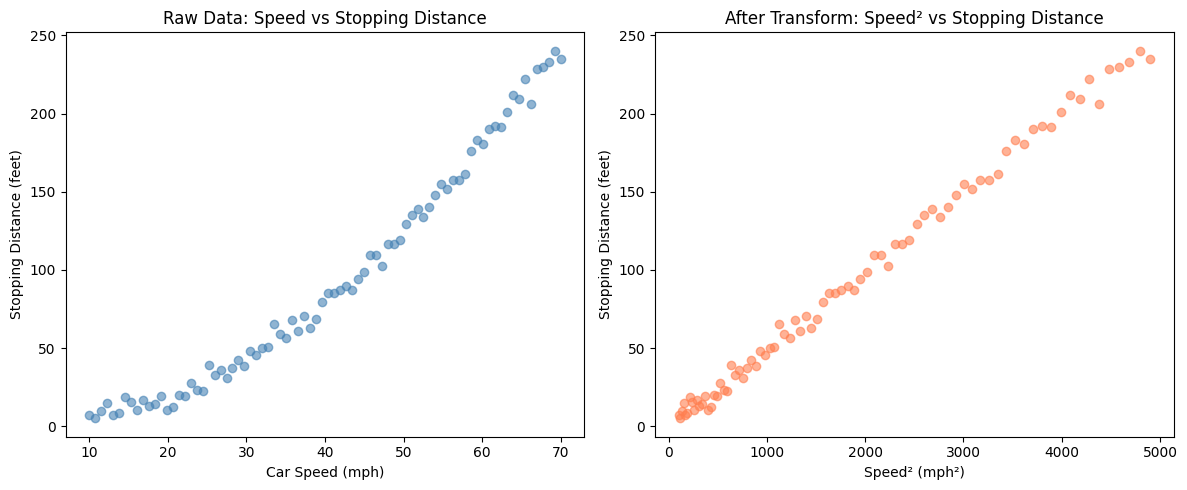

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: raw data (nonlinear relationship)
axes[0].scatter(speed, stopping_distance, alpha=0.6, color='steelblue')
axes[0].set_xlabel('Car Speed (mph)')
axes[0].set_ylabel('Stopping Distance (feet)')
axes[0].set_title('Raw Data: Speed vs Stopping Distance')

# Right: after squaring the feature (linear relationship)
axes[1].scatter(speed**2, stopping_distance, alpha=0.6, color='coral')
axes[1].set_xlabel('Speed² (mph²)')
axes[1].set_ylabel('Stopping Distance (feet)')
axes[1].set_title('After Transform: Speed² vs Stopping Distance')

plt.tight_layout()
plt.show()

Notice how the left plot shows a clear curve, while the right plot is nearly a straight line. A linear model fit on `speed²` will capture this relationship accurately, while a linear model fit on raw `speed` would systematically underpredict at the extremes and overpredict in the middle.

In practice, you'd use `sklearn.preprocessing.PolynomialFeatures` to generate these automatically.

## Example 2: Log Transform (Bedrooms → House Price)

When the target variable grows **exponentially**, the raw data will fan out and a straight line won't fit well. Taking the **log of the target** compresses the large values and stretches the small ones, often producing a much more linear relationship.

This is also useful when the target is heavily right-skewed (a few very large values pulling the distribution). Log-transforming the target can also help satisfy the linear regression assumption of normally distributed residuals.

In [4]:
# Synthetic data: price grows exponentially with bedrooms
bedrooms = np.arange(1, 16)  # 1 to 15 bedrooms
noise = np.random.normal(0, 5, size=bedrooms.shape)
price = 0.05 * np.exp(bedrooms) + noise

/var/folders/fd/t23bhkdn7b90wdmn_yy1_2_40000gn/T/ipykernel_5647/905463477.py:10: RuntimeWarning: invalid value encountered in log
  axes[1].scatter(bedrooms, np.log(price), alpha=0.6, color='coral')


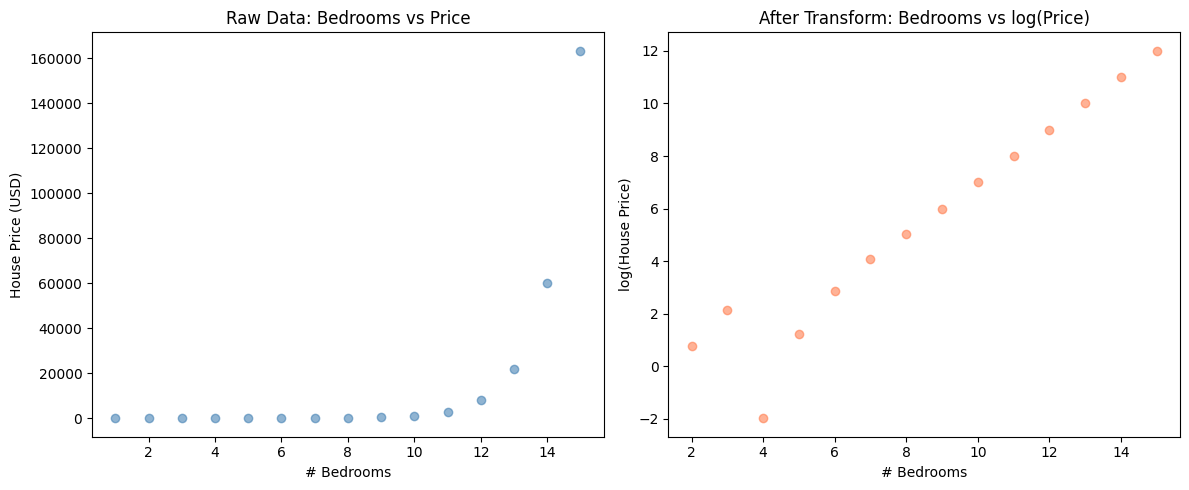

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: raw exponential relationship
axes[0].scatter(bedrooms, price, alpha=0.6, color='steelblue')
axes[0].set_xlabel('# Bedrooms')
axes[0].set_ylabel('House Price (USD)')
axes[0].set_title('Raw Data: Bedrooms vs Price')

# Right: log-transformed target
axes[1].scatter(bedrooms, np.log(price), alpha=0.6, color='coral')
axes[1].set_xlabel('# Bedrooms')
axes[1].set_ylabel('log(House Price)')
axes[1].set_title('After Transform: Bedrooms vs log(Price)')

plt.tight_layout()
plt.show()

The left plot is dominated by the exponential growth; most of the data is squished near the bottom. The right plot, after taking `log(price)`, shows a clean linear trend.

**Important:** when you log-transform the target, your model predicts `log(price)`. To get back to actual dollars, you need to exponentiate the predictions: `price_pred = np.exp(model.predict(X))`.

This is exactly the insight behind the best-performing submissions on Project 1 (the Ames Housing dataset). The target variable `SalePrice` is right-skewed, and log-transforming it before fitting the model significantly improved results.

## Example 3: Square Root Transform (Lot Area → Sale Price)

Some relationships show **diminishing returns**: the first 1,000 sq ft of land matters a lot more than going from 10,000 to 11,000. The relationship isn't exponential (so log would be too aggressive), but it's clearly not linear either. It follows a concave curve.

A **square root transform** gently compresses the upper end of the scale, which is often just right for this kind of pattern. Think of it as sitting between "no transform" and "log" in terms of how aggressively it squashes large values.

In [6]:
# Synthetic data: price grows with sqrt of lot area (diminishing returns)
lot_area = np.linspace(500, 20000, 100)
noise = np.random.normal(0, 8000, size=lot_area.shape)
sale_price = 1500 * np.sqrt(lot_area) + noise

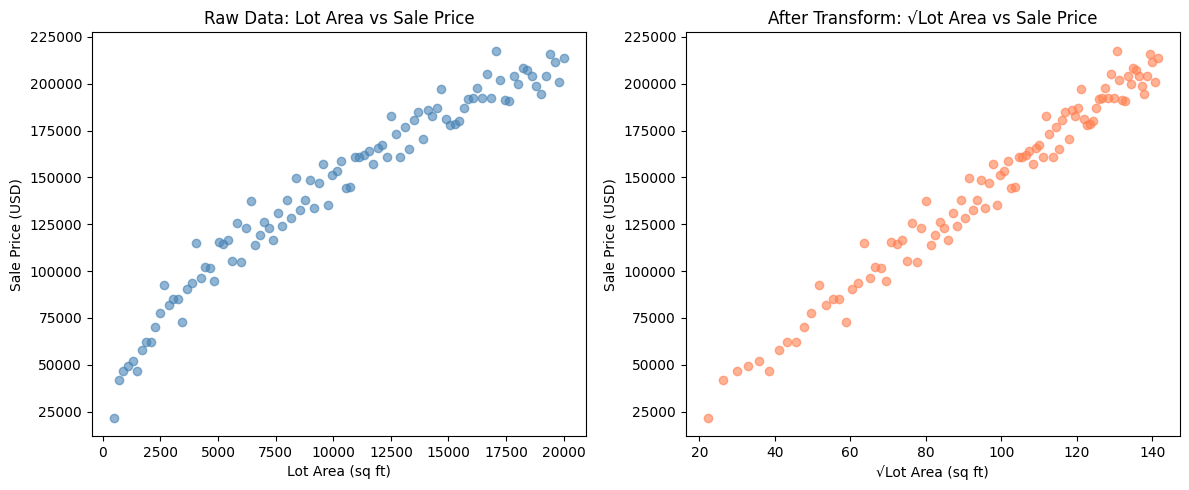

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: raw data (concave curve)
axes[0].scatter(lot_area, sale_price, alpha=0.6, color='steelblue')
axes[0].set_xlabel('Lot Area (sq ft)')
axes[0].set_ylabel('Sale Price (USD)')
axes[0].set_title('Raw Data: Lot Area vs Sale Price')

# Right: after sqrt transform (linearized)
axes[1].scatter(np.sqrt(lot_area), sale_price, alpha=0.6, color='coral')
axes[1].set_xlabel('√Lot Area (sq ft)')
axes[1].set_ylabel('Sale Price (USD)')
axes[1].set_title('After Transform: √Lot Area vs Sale Price')

plt.tight_layout()
plt.show()

The left plot curves and flattens out; a straight line would overpredict for mid-range lots and underpredict at the extremes. The right plot, using `√lot_area`, is much closer to linear.

Square root is a good default to try when you see a concave (flattening) relationship. It's less dramatic than log, which makes it appropriate when the data spans maybe one or two orders of magnitude rather than many.

## Key Takeaways

- Linear regression requires a linear relationship between inputs and output. Feature transforms let you **reshape** nonlinear data to meet that requirement.
- **Polynomial features** (x², x³, x₁·x₂) help when the relationship follows a power curve or involves interactions between features.
- **Square root transforms** help when you see diminishing returns (concave curves). Less aggressive than log.
- **Log transforms** help when the data is exponential or heavily skewed. You can log-transform features, the target, or both.
- The model is still linear regression; you're just giving it better ingredients to work with.
- Always check your **residual plots** after fitting. If they show patterns (curves, fans), a transform might help.